In [75]:
circle = [
    [1,1,1],
    [1,0,1],
    [1,1,1]
    ]

In [76]:
cross = [
    [1,0,1],
    [0,1,0],
    [1,0,1]

]

In [77]:
print(f"cirle = {circle}, cross = {cross}")

cirle = [[1, 1, 1], [1, 0, 1], [1, 1, 1]], cross = [[1, 0, 1], [0, 1, 0], [1, 0, 1]]


In [78]:
import random

# create the check to see if the matrix has the same amount of items per row


def matrix_shape_check(matrix):
    """Checks if all rows in a matrix have the same amount of items"""
    row_nr = 0
    base_row_length = len(matrix[0])
    for item in matrix:
        rows_col = len(matrix[row_nr])
        if base_row_length != rows_col:
            print(f'Error in {matrix} {item}')
            return False
        row_nr += 1
    return True


# create the function to multiply the 2 matrixes

def matrix_multiplication(matrix1, matrix2):
    """multiplies two matrixes if permitted"""
    # check if both lists of lists have the proper shape to be a matrix.

    if len(matrix1[0]) == len(matrix2):
        pass
    # DeMorgan
    # not (A and B) == not A or not B

        if not (matrix_shape_check(matrix1) and matrix_shape_check(matrix2)):
            return None
    else:
        print('Matrix shapes != match!')
        return None

    # transpose matrix_2
    matrix2t = list(map(list, zip(*matrix2)))

    # create the new matrix for the multiplication result
    matrix3 = []

    # cycle true the matrixes to calculate the cells for matrix3 row by row and add them to the new matrix
    for i in range(len(matrix1)):
        row = []
        for j in range(len(matrix2[0])):
            cel = list(map(lambda x, y: x * y, matrix1[i], matrix2t[j]))
            cel_s = sum(cel)
            row.append(cel_s)
        matrix3.append(row)

    return matrix3


def initial_input(list_of_list_matrix):
    """flaten a matrix to ( n * 0) """
    flattned_matrix = [sum(list_of_list_matrix, [])]
    initial_matrix = list(map(list, zip(*flattned_matrix)))
    return initial_matrix
    # return flattned_matrix


# a function to generate random weights
def initial_random_weights(i_n):
    """generate random weights totaling to 1"""

    i_n = [sum(i_n, [])]

    # Generate n random values
    initial_weights = [random.random() for i in range(len(i_n[0]))]

    # Calculate the sum of the random values
    weight_sum = sum(initial_weights)

    # Divide each random value by the sum to normalize them
    random_weights = [round(item/weight_sum,2) for item in initial_weights]

    return [random_weights]


In [79]:
# def matrix_flattener(list_of_list_matrix):
#     flattned_matrix = sum(list_of_list_matrix, [])
#     return flattned_matrix

# import homebrew_functions as hb

In [80]:

weights0 = initial_random_weights(circle)

display(weights0)

[[0.11, 0.16, 0.23, 0.06, 0.04, 0.08, 0.01, 0.18, 0.15]]

In [122]:
import random
# create random array

matrix = [[random.randint(0, 1) for j in range(3)] for i in range(3)]



I_n = initial_input(matrix)
W_n = initial_random_weights(matrix)

print (I_n)
print()
print(W_n)

[[0], [1], [0], [0], [0], [1], [1], [1], [1]]

[[0.12, 0.06, 0.13, 0.08, 0.13, 0.06, 0.18, 0.11, 0.11]]


# output:
list of lists
[[0],   the 0th is the circle
[0]]    the 1st is the diagonal cross



In [123]:
matrix = matrix

Generate the imputs

In [124]:
input_n = initial_input(matrix)

print(input_n)

[[0], [1], [0], [0], [0], [1], [1], [1], [1]]


Generate the initial weights0 (In W0n) and weights1 (In W1n)

In [125]:
weights0 =initial_random_weights(matrix)
weights1 =initial_random_weights(matrix)
print (weights0,

       weights1)

[[0.01, 0.01, 0.05, 0.21, 0.07, 0.11, 0.24, 0.05, 0.26]] [[0.09, 0.1, 0.1, 0.08, 0.17, 0.06, 0.04, 0.18, 0.19]]


set initial bias

In [126]:
import random
bias0 = random.uniform(-1, 1)
bias1 = random.uniform(-1, 1)

bias0 = 0
bias1 = 0

Calculate output

In [127]:
output = []
output0 = sum(matrix_multiplication(weights0,input_n), [])
output1 = sum(matrix_multiplication(weights1,input_n), [])


output.append(output0)
output.append(output1)

# add bias
output0[0] += bias0
output1[0] += bias1


# print(input_n)
# print(weights0)
print (output)
print (type(output))

[[0.6699999999999999], [0.5700000000000001]]
<class 'list'>


apply a softmax

In [128]:
def softmax(output):
    output0 = output[0][0]
    output1 = output[1][0]
    e = 2.718281828459045
    softmax_output0 = e ** output0 / (e ** output0 + e ** output1)
    softmax_output1 = e ** output1 / (e ** output0 + e ** output1)
    return [[softmax_output0], [softmax_output1]]

input_values = [[0.91], [0.9700000000000001]]
print (type(input_values))
softmax_output = softmax(input_values)
print(softmax_output)

<class 'list'>
[[0.4850044983805899], [0.5149955016194101]]


In [129]:
import math

def softmax(x):
    # Calculate the exponential of each element in the input array
    exp_x = [math.exp(i[0]) for i in x]
    # Calculate the sum of exponential elements
    sum_exp_x = sum(exp_x)
    # Calculate the softmax of each element
    softmax_x = [[i / sum_exp_x] for i in exp_x]
    return softmax_x

# Example usage
input_values = [[0.91], [0.9700000000000001]]
print (type(input_values))
softmax_output = softmax(input_values)
print(softmax_output)

<class 'list'>
[[0.4850044983805899], [0.5149955016194101]]


In [130]:
def result_label(softmax_output):
    if softmax_output[0] < softmax_output[1]:
        return circle
    elif softmax_output[1] < softmax_output[0]:
        return cross
    else:
        return None

def result_string(softmax_output):
    if softmax_output[0] < softmax_output[1]:
        return 'circle'
    elif softmax_output[1] < softmax_output[0]:
        return 'cross'
    else:
        return 'None'

lookslike_matrix = result_label(softmax_output)
lookslike_string = result_string(softmax_output)


In [131]:
output = []
output0 = sum(matrix_multiplication(weight_c,input_n), [])
output1 = sum(matrix_multiplication(weight_x,input_n), [])

output.append(output0)
output.append(output1)

# add bias
output0[0] += bias_c
output1[0] += bias_x

# print the output
print (output)


NameError: name 'weight_c' is not defined

start to learn


visualisation!

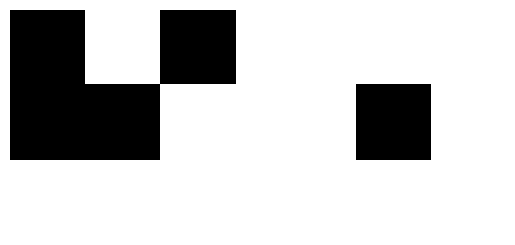

The image looks most like a circle


In [132]:
import matplotlib.pyplot as plt



# Create a grayscale colormap
cmap = plt.get_cmap('gray')

# Set up a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2)

# Display the cross array in the left subplot
ax1.imshow(matrix, cmap=cmap)
ax1.axis('off')

# Display the circle array in the right subplot
ax2.imshow(lookslike_matrix, cmap=cmap)
ax2.axis('off')

# Show the plot
plt.show()
print(f'The image looks most like a {lookslike_string}')
